***

In [1]:
import pandas as pd
import sqlite3 # library for working with sqlite database
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = sqlite3.connect("./mimic_subset.db") # Create a connection to the on-disk database

# BME 590 Data Science and Health
## Midterm Project

For the midterm project, you will be putting many of the skills that we have covered in the course so far to create a clinical risk prediction score. Please follow the instructions in this notebook carefully to make sure that you receive full credit for this assignment.

### Background

In 1987, a paper was published in the *Journal of Chronic Disease* titled *A New Method of Classifying Prognostic Comorbidity in Longitudinal Studies: Development and Validation*. This was one of the first papers that created a clinical risk score that could be easily computed and could predict clinical outcomes. To give you an idea of how popular this score is, it has been cited 27,497 times at the time that this assignment was created. As a note, comorbidity describes how many different diseases a patient has. 

In 1987, statistical methods were not as easy to apply as they are today. In addition, data were much harder to come by and to analyze. Due to the improvement of computing power and general statistical practice, it is now much easier to create clinical risk scores than in the past. This will your primary task in this assignment.

## Task 1: Background

Before you begin creating your own version of the Charlson Comorbidity Index, as it is known, it is important to familiarize yourself with the paper. A copy of it can be found [here](http://www.aqc.ch/download/HSM_Suppl_8_charlson.pdf). 

### Answer the following questions:

#### How many patients' data were used to create the model?
559

#### What time frame were the data from?
During a one-month period

#### How was the model validated?
The model was tested for its ability to predict risk of death from comorbid disease in a cohort of 685 patients who were treated for primary breast cancer at Yale New Haven Hospital between 1962 and 1969. Then its performance was compared to the method of classifying comorbid disease developed by Kaplan and Feinstein

#### How many patients were used to validate the model results?
685

#### What were the characteristics of patients in the "Testing population"?
They are all female breast cancer patients

___

In the original paper, the conditions listed are not coded in any way. Follow-up papers by [Deyo in 1992](https://www.ncbi.nlm.nih.gov/pubmed/1607900) and [Quan in 2005](https://www.ncbi.nlm.nih.gov/pubmed/16224307), added the ICD-9-CM groupings for the conditions listed in the Charlson Comorbidity Index. In the provided database, a lookup between condition category and code has been provided.

## Task 2: Exploratory Data Analysis and SQL

For this project, the data is located [here](https://duke.box.com/s/vx627f0cypndusbl2k6jyqp9vo33d15g). Please download the database and put it in the same directory as this notebook (or in its own separate directory if you choose). **Make sure you add the database to the provided .gitignore file**. 

### DO NOT COMMIT THE DB FILE

##### Create a connection to the database and complete the following tasks/answer the questions using SQL queries. Remember that you can make a SQL query to the database with the following syntax:

`pd.read_sql(""" YOUR SQL QUERY """, conn)`

### General

#### List the tables

In [2]:
pd.read_sql("SELECT * FROM sqlite_master where type='table'", conn)

,type,name,tbl_name,rootpage,sql
0,table,admission,admission,2,"CREATE TABLE ""admission"" (\n""index"" INTEGER,\n..."
1,table,diagnosis,diagnosis,1233,"CREATE TABLE ""diagnosis"" (\n""index"" INTEGER,\n..."
2,table,charlson_codes,charlson_codes,4982,"CREATE TABLE ""charlson_codes"" (\n""index"" INTEG..."
3,table,patient,patient,5087,"CREATE TABLE ""patient"" (\n""index"" INTEGER,\n ..."


#### For each table, select a small number of records (rows) and display the columns

In [3]:
pd.read_sql("SELECT * FROM admission LIMIT 5", conn)


,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,...,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,0,2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,...,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,None,None,BRAIN MASS,0,1
1,1,13,34,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,2191-02-23 04:23:00,2191-02-23 07:25:00,BRADYCARDIA,0,1
2,2,17,38,36,165660,2134-05-10 11:30:00,2134-05-20 13:16:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,Medicare,ENGL,NOT SPECIFIED,MARRIED,WHITE,None,None,VENTRAL HERNIA/SDA,0,1
3,3,25,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2199-10-20 09:34:00,2199-10-20 13:25:00,PNEUMONIA,0,1
4,4,26,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,2199-12-21 20:38:00,2199-12-22 00:01:00,ALTERED MENTAL STATUS,0,1


In [4]:
pd.read_sql("SELECT * FROM diagnosis LIMIT 5", conn)

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,0,0,1297,109,172335,1.0,40301
1,1,1,1298,109,172335,2.0,486
2,2,2,1299,109,172335,3.0,58281
3,3,3,1300,109,172335,4.0,5855
4,4,4,1301,109,172335,5.0,4254


In [5]:
pd.read_sql("SELECT * FROM charlson_codes LIMIT 5", conn)

,index,code,category
0,0,410,MI
1,1,4100,MI
2,2,41000,MI
3,3,41001,MI
4,4,41002,MI


In [6]:
pd.read_sql("SELECT * FROM patient LIMIT 5", conn)

,index,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,0,234,249,F,2075-03-13 00:00:00,None,None,None,0
1,1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,None,1
2,2,236,251,M,2090-03-15 00:00:00,None,None,None,0
3,3,237,252,M,2078-03-06 00:00:00,None,None,None,0
4,4,238,253,F,2089-11-26 00:00:00,None,None,None,0


### Patients:

#### What is the breakdown of gender for patients?

In [7]:
pd.read_sql("SELECT GENDER FROM patient WHERE gender = 'F'", conn).count()/pd.read_sql("SELECT GENDER FROM patient", conn).count()


GENDER    0.4385
dtype: float64

In [8]:
pd.read_sql("SELECT GENDER FROM patient WHERE gender = 'M'", conn).count()/pd.read_sql("SELECT GENDER FROM patient", conn).count()

GENDER    0.5615
dtype: float64

#### Of the patients in the patients table, how many of them have a death date listed? 

In [9]:
pd.read_sql("SELECT DOD FROM patient WHERE NOT DOD = 'None'", conn).count()

DOD    15759
dtype: int64

In [10]:
pd.read_sql("SELECT * FROM patient WHERE NOT DOD = 'None'", conn)

,index,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,None,1
1,7,241,257,F,2031-04-03 00:00:00,2121-07-08 00:00:00,2121-07-08 00:00:00,2121-07-08 00:00:00,1
2,10,244,261,M,2025-08-04 00:00:00,2102-06-29 00:00:00,2102-06-29 00:00:00,2102-06-29 00:00:00,1
3,12,246,263,M,2104-06-18 00:00:00,2168-06-13 00:00:00,2168-06-13 00:00:00,None,1
4,17,251,268,F,2132-02-21 00:00:00,2198-02-18 00:00:00,2198-02-18 00:00:00,None,1
...,...,...,...,...,...,...,...,...,...
15754,46497,31822,44019,F,1901-01-14 00:00:00,2201-01-14 00:00:00,2201-01-14 00:00:00,2201-01-14 00:00:00,1
15755,46504,31829,44058,M,2102-06-28 00:00:00,2156-01-07 00:00:00,None,2156-01-07 00:00:00,1
15756,46505,31830,44059,F,2051-03-25 00:00:00,2127-08-07 00:00:00,2127-08-07 00:00:00,None,1
15757,46513,31838,44083,M,2057-11-15 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,2114-02-20 00:00:00,1


### Admissions:

#### How many unique patients are there in the admissions dataset?

In [11]:
pd.read_sql("SELECT * FROM admission LIMIT 5", conn).columns

Index(['index', 'Unnamed: 0', 'ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME',
       'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

In [12]:
#pd.read_sql("SELECT SUBJECT_ID From patient", conn)

In [13]:
#pd.read_sql("SELECT DISTINCT SUBJECT_ID From patient", conn)

In [14]:
#pd.read_sql("SELECT ROW_ID From admission", conn)

In [15]:
pd.read_sql("SELECT DISTINCT SUBJECT_ID From admission", conn)

,SUBJECT_ID
0,23
1,34
2,36
3,357
4,85
...,...
17675,98794
17676,98797
17677,98800
17678,98802


There are 17680 unique patients in the admissions dataset

#### How many unique encounters are there in this dataset?

In [16]:
pd.read_sql("SELECT DISTINCT HADM_ID From admission", conn)

,HADM_ID
0,124321
1,144319
2,165660
3,101651
4,117876
...,...
21874,105447
21875,191113
21876,101071
21877,122631


There are 21879 unique encounters in this dataset

#### How many encounters have an ED time (either registration or out) listed?

In [17]:
pd.read_sql("""SELECT HADM_ID, EDREGTIME, EDOUTTIME From admission WHERE NOT EDREGTIME = 'None' 
            AND NOT EDOUTTIME = 'None'""", conn)

,HADM_ID,EDREGTIME,EDOUTTIME
0,144319,2191-02-23 04:23:00,2191-02-23 07:25:00
1,101651,2199-10-20 09:34:00,2199-10-20 13:25:00
2,117876,2199-12-21 20:38:00,2199-12-22 00:01:00
3,112077,2167-07-25 16:37:00,2167-07-25 20:46:00
4,182383,2121-11-30 16:40:00,2121-11-30 19:57:00
...,...,...,...
14490,187987,2200-10-14 23:42:00,2200-10-15 04:41:00
14491,105447,2132-12-24 18:53:00,2132-12-24 21:41:00
14492,191113,2131-03-30 19:44:00,2131-03-30 22:41:00
14493,101071,2151-03-05 17:23:00,2151-03-05 21:06:00


14495 encounters have an ED time

#### List the primary diagnoses (Diagnosis field) in order of their prevalence

In [18]:
pd.read_sql("""SELECT DISTINCT DIAGNOSIS 
               FROM (select admission.*, count(*) over (partition by DIAGNOSIS) as cnt
                     FROM admission
                     ) admission
               ORDER BY cnt DESC
""", conn)

,DIAGNOSIS
0,PNEUMONIA
1,SEPSIS
2,ALTERED MENTAL STATUS
3,INTRACRANIAL HEMORRHAGE
4,CONGESTIVE HEART FAILURE
...,...
6747,WOUND DRAINAGE
6748,WOUND INFECTION;HYPOTENSION
6749,WOUND TO RLE
6750,WOUND ULCER


#### Now list the count of diagnoses along with the diagnosis name only for patients who died in their hospital stay in descending order

In [19]:
# pd.read_sql("""SELECT SUBJECT_ID, ADMITTIME, DISCHTIME, DEATHTIME, 
#                ADMISSION_LOCATION, DISCHARGE_LOCATION, EDREGTIME, 
#                EDOUTTIME, DIAGNOSIS, HOSPITAL_EXPIRE_FLAG 
#                FROM admission LIMIT 50
# """, conn)

In [20]:
death = pd.read_sql("""SELECT * FROM admission
               WHERE HOSPITAL_EXPIRE_FLAG = '1' AND NOT DEATHTIME = 'None'
""", conn)
death['DIAGNOSIS_COUNT'] = death.DIAGNOSIS.str.count(';')+1
death

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,...,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,DIAGNOSIS_COUNT
0,9,130,169,124,138376,2165-12-31 18:55:00,2166-02-01 06:55:00,2166-02-01 06:55:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,...,ENGL,CATHOLIC,MARRIED,WHITE,None,None,PNEUMONIA;CHRONIC OBST PULM DISEASE,1,1,2
1,34,193,149,109,189332,2142-08-28 19:48:00,2142-08-30 15:20:00,2142-08-30 15:20:00,EMERGENCY,EMERGENCY ROOM ADMIT,...,ENGL,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,2142-08-28 16:12:00,2142-08-28 21:15:00,SHORTNESS OF BREATH,1,1,1
2,35,196,152,111,155897,2144-07-01 04:12:00,2144-07-01 14:55:00,2144-07-01 14:55:00,EMERGENCY,EMERGENCY ROOM ADMIT,...,ENGL,PROTESTANT QUAKER,MARRIED,WHITE,2144-07-01 02:30:00,2144-07-01 11:21:00,PNEUMONIA,1,1,1
3,36,242,390,305,194340,2129-08-20 18:03:00,2129-09-07 17:55:00,2129-09-07 17:55:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,...,PORT,CATHOLIC,MARRIED,WHITE,None,None,HEART FAILURE,1,1,1
4,38,358,628,502,116367,2143-10-23 21:05:00,2143-11-04 17:28:00,2143-11-04 17:28:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,ENGL,PROTESTANT QUAKER,MARRIED,WHITE,2143-10-23 19:44:00,2143-10-23 22:45:00,RESP DISTRESS,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,21834,58927,58550,98669,108710,2147-04-07 15:09:00,2147-04-14 10:00:00,2147-04-14 10:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,ENGL,UNOBTAINABLE,None,UNABLE TO OBTAIN,2147-04-07 13:31:00,2147-04-07 16:55:00,SUBARACHNOID HEMORRHAGE,1,1,1
2282,21863,58957,58580,98753,185764,2172-02-11 21:26:00,2172-03-02 08:00:00,2172-03-02 08:00:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,ENGL,CATHOLIC,MARRIED,WHITE,2172-02-11 16:49:00,2172-02-11 22:52:00,R/O METASTASIS,1,1,1
2283,21870,58966,58589,98768,127022,2112-09-15 09:45:00,2112-09-17 08:20:00,2112-09-17 08:20:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,ENGL,JEWISH,WIDOWED,WHITE,2112-09-15 09:30:00,2112-09-15 11:46:00,LEUKOCYTOSIS,1,1,1
2284,21874,58970,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,...,ENGL,CATHOLIC,WIDOWED,WHITE,2132-12-24 18:53:00,2132-12-24 21:41:00,ALTERED MENTAL STATUS,1,1,1


In [21]:
death[{'SUBJECT_ID', 'DIAGNOSIS_COUNT', 'DIAGNOSIS'}].sort_values(by=['DIAGNOSIS_COUNT'], ascending=False)

,SUBJECT_ID,DIAGNOSIS_COUNT,DIAGNOSIS
299,31203,4,FALL;HYPOXIA;DEHYDRATION;N/V/D
802,45601,4,VTACH;CONGESTIVE HEART FAILURE;ACUTE RENAL FAI...
1880,84629,3,STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK
1834,88632,3,ANEMIA;RENAL FAILURE;ASCITES
894,58771,3,STROKE;TELEMETRY;TRANSIENT ISCHEMIC ATTACK
...,...,...,...
845,54083,1,WEAKNESS
844,54050,1,BRAIN BLEED
843,44837,1,COLONIC MASS
842,57518,1,INTRACRANIAL HEMORRHAGE


### Charlson Codes:

#### How many categories are there? 

In [22]:
pd.read_sql("SELECT DISTINCT category FROM charlson_codes", conn)

,category
0,MI
1,CHF
2,PVD
3,Stroke
4,Dementia
5,Pulmonary
6,Rheumatic
7,PUD
8,LiverMild
9,DM


There are 17 distinct categories in charlson codes

### Diagnoses

#### What is the minimum, average, and maximum count of codes that is given to a patient at a particular encounter?

In [23]:
pd.read_sql("""SELECT SUBJECT_ID, HADM_ID, COUNT(ICD9_CODE) AS count_of_codes
               FROM diagnosis 
               GROUP BY SUBJECT_ID, HADM_ID
               ORDER BY COUNT(ICD9_CODE) DESC
""", conn)

,SUBJECT_ID,HADM_ID,count_of_codes
0,502,116367,39
1,878,102365,39
2,902,143497,39
3,2092,105566,39
4,8231,101216,39
...,...,...,...
21874,93587,119005,1
21875,96006,193340,1
21876,96391,192062,1
21877,96491,152310,1


In [24]:
pd.read_sql("""SELECT MIN(count_of_codes) AS minimum_count_of_codes, 
               MAX(count_of_codes) AS maximum_count_of_codes,
               AVG(count_of_codes) AS average_count_of_codes
               FROM 
               (SELECT SUBJECT_ID, HADM_ID, COUNT(ICD9_CODE) AS count_of_codes
               FROM diagnosis 
               GROUP BY SUBJECT_ID, HADM_ID
               ORDER BY COUNT(ICD9_CODE) DESC)
""", conn)

,minimum_count_of_codes,maximum_count_of_codes,average_count_of_codes
0,1,39,14.632936


### Combined information

#### There is a `DEATHTIME` column in the admission table. In addition, there is death information present in the patient table. Is the information in the admission table complete? (Are there patients who have death information in the patient table who do not have the same information in the admissions table?)

In [25]:
pd.read_sql("SELECT DOD FROM patient WHERE NOT DOD = 'None'", conn).count()

DOD    15759
dtype: int64

In [26]:
pd.read_sql("SELECT DEATHTIME FROM admission WHERE NOT DEATHTIME = 'None'", conn).count()

DEATHTIME    2286
dtype: int64

Therefore, the information in the admission table is incomplete.

#### Join the diagnosis and the Charlson tables together by code and list the Charlson Categories and their counts in descending order

In [27]:
pd.read_sql("""SELECT *
                FROM diagnosis
                LEFT JOIN charlson_codes ON diagnosis.ICD9_CODE = charlson_codes.code
""", conn)

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,index,code,category
0,0,0,1297,109,172335,1.0,40301,4762.0,40301,Renal
1,1,1,1298,109,172335,2.0,486,NaN,None,None
2,2,2,1299,109,172335,3.0,58281,4862.0,58281,Renal
3,3,3,1300,109,172335,4.0,5855,5004.0,5855,Renal
4,4,4,1301,109,172335,5.0,4254,232.0,4254,CHF
...,...,...,...,...,...,...,...,...,...,...
320345,320149,651042,639798,97503,188195,2.0,20280,11065.0,20280,Cancer
320346,320150,651043,639799,97503,188195,3.0,V5869,NaN,None,None
320347,320151,651044,639800,97503,188195,4.0,V1279,NaN,None,None
320348,320152,651045,639801,97503,188195,5.0,5275,NaN,None,None


In [28]:
pd.read_sql("""SELECT category, COUNT(ICD9_CODE) AS count_of_codes 
               FROM
              (SELECT *
               FROM diagnosis
               INNER JOIN charlson_codes ON diagnosis.ICD9_CODE = charlson_codes.code)
               GROUP BY category
               ORDER BY count_of_codes DESC
""", conn)

,category,count_of_codes
0,CHF,11347
1,Pulmonary,6402
2,Renal,6209
3,DM,5295
4,Stroke,4041
5,MI,3457
6,LiverMild,3407
7,PVD,2918
8,Mets,2902
9,Cancer,2901


## Task 3: Visualization

For this task, you can use pandas along with any plotting library that we've learned about to create the following visualizations. You may have to create a separate dataframe specifically for each of these plots.

> One important concept in hospital care is the Length of Stay for a patient. In general, the longer a patient stays, the more severe their case. There are many initiatives to try and reduce the length of stay. 

#### Create a length of stay (in days) column in the dataframe. The Length of Stay is defined as the discharge time minus the admission time. 

For this, you will need to use the `.dt.days` accessor as seen [here](https://stackoverflow.com/a/45039811)

In [29]:
admission = pd.read_sql("SELECT * FROM admission", conn)
admission[['ADMITTIME','DISCHTIME']] = admission[['ADMITTIME','DISCHTIME']].apply(pd.to_datetime)
admission['length_of_stay'] = (admission['DISCHTIME'] - admission['ADMITTIME']).dt.days
admission

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,...,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,length_of_stay
0,0,2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,...,ENGL,CATHOLIC,MARRIED,WHITE,None,None,BRAIN MASS,0,1,6
1,1,13,34,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,ENGL,CATHOLIC,MARRIED,WHITE,2191-02-23 04:23:00,2191-02-23 07:25:00,BRADYCARDIA,0,1,2
2,2,17,38,36,165660,2134-05-10 11:30:00,2134-05-20 13:16:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,ENGL,NOT SPECIFIED,MARRIED,WHITE,None,None,VENTRAL HERNIA/SDA,0,1,10
3,3,25,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,ENGL,NOT SPECIFIED,MARRIED,WHITE,2199-10-20 09:34:00,2199-10-20 13:25:00,PNEUMONIA,0,1,3
4,4,26,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,ENGL,NOT SPECIFIED,MARRIED,WHITE,2199-12-21 20:38:00,2199-12-22 00:01:00,ALTERED MENTAL STATUS,0,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21874,21874,58970,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,...,ENGL,CATHOLIC,WIDOWED,WHITE,2132-12-24 18:53:00,2132-12-24 21:41:00,ALTERED MENTAL STATUS,1,1,0
21875,21875,58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1,2
21876,21876,58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1,0
21877,21877,58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,ENGL,NOT SPECIFIED,MARRIED,WHITE,None,None,RENAL CANCER/SDA,0,1,8


#### Create a plot which contains boxplots that contain the length of stay information, broken down by Admission Type

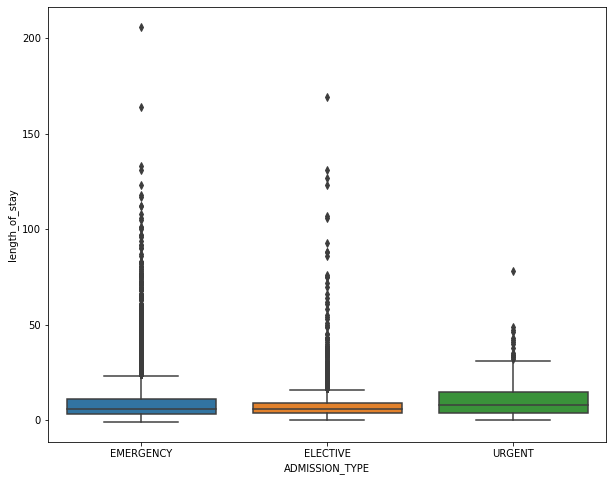

In [30]:
fig, ax = plt.subplots(figsize=(10,8))
length_of_stay_plot = sns.boxplot(x = 'ADMISSION_TYPE', y = 'length_of_stay', 
                                  data = admission)

#### Create a scatter plot which has the length of stay in days on one axis and the number of diagnosis codes for a particular encounter on the other

In [31]:
pd.read_sql("""SELECT HADM_ID, COUNT(ICD9_CODE) AS count_of_codes
               FROM diagnosis 
               GROUP BY HADM_ID
               ORDER BY COUNT(ICD9_CODE) DESC
""", conn)

,HADM_ID,count_of_codes
0,198883,39
1,198762,39
2,198677,39
3,198618,39
4,198072,39
...,...,...
21874,109826,1
21875,106136,1
21876,105193,1
21877,103055,1


In [32]:
admission = pd.read_sql("""SELECT * 
               FROM
               (SELECT HADM_ID, COUNT(ICD9_CODE) AS count_of_codes
               FROM diagnosis 
               GROUP BY HADM_ID
               ORDER BY COUNT(ICD9_CODE) DESC) AS count
               LEFT JOIN admission ON count.HADM_ID=admission.HADM_ID
""", conn)
admission[['ADMITTIME','DISCHTIME']] = admission[['ADMITTIME','DISCHTIME']].apply(pd.to_datetime)
admission['length_of_stay'] = (admission['DISCHTIME'] - admission['ADMITTIME']).dt.days
admission

,HADM_ID,count_of_codes,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,...,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,length_of_stay
0,198883,39,6547,43080,44680,55204,198883,2132-05-28 15:54:00,2132-07-05 01:00:00,2132-07-05 01:00:00,...,ENGL,CATHOLIC,DIVORCED,WHITE,None,None,ESOPHAGEAL MASS\EUS,1,1,37
1,198762,39,2823,37219,35777,29338,198762,2162-10-08 20:12:00,2162-10-26 19:42:00,None,...,ENGL,EPISCOPALIAN,MARRIED,BLACK/AFRICAN AMERICAN,None,None,ABDOMINAL PAIN;ANEMIA,0,1,17
2,198677,39,1824,30343,28763,23568,198677,2114-10-15 17:31:00,2114-11-10 15:33:00,None,...,ENGL,CATHOLIC,WIDOWED,WHITE,2114-10-15 13:05:00,2114-10-15 20:05:00,FEVER; TACHYCARDIA; JP DRAIN OUT,0,1,25
3,198618,39,15836,52729,53157,81660,198618,2144-02-03 23:24:00,2144-03-04 16:06:00,None,...,ENGL,NOT SPECIFIED,MARRIED,WHITE,2144-02-03 19:44:00,2144-02-04 00:10:00,ABDOMINAL PAIN,0,1,29
4,198072,39,19442,56469,58197,97531,198072,2143-07-01 22:18:00,2143-08-04 00:00:00,2143-08-04 00:00:00,...,ENGL,CATHOLIC,SINGLE,WHITE,2143-07-01 17:11:00,2143-07-01 23:42:00,GASTRIC OUTLET OBSTRUCTION,1,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21874,109826,1,3754,39381,41025,43983,109826,2119-11-17 23:49:00,2119-11-19 15:00:00,None,...,ENGL,CATHOLIC,SINGLE,WHITE,2119-11-17 16:57:00,2119-11-18 01:15:00,DIABETIC KETOACIDOSIS,0,1,1
21875,106136,1,21625,58714,56126,91149,106136,2182-03-27 11:30:00,2182-03-28 12:05:00,None,...,ENGL,UNITARIAN-UNIVERSALIST,WIDOWED,WHITE,None,None,CEREBRAL ANEURYSM/SDA,0,1,1
21876,105193,1,11482,48236,50089,72040,105193,2147-11-14 19:31:00,2147-11-16 12:50:00,None,...,ENGL,NOT SPECIFIED,SINGLE,WHITE,2147-11-14 11:08:00,2147-11-14 21:09:00,SUBARACHNOID HEMORRHAGE,0,1,1
21877,103055,1,11203,47953,47304,63315,103055,2197-03-20 07:15:00,2197-03-21 13:15:00,None,...,ENGL,NOT SPECIFIED,MARRIED,MULTI RACE ETHNICITY,None,None,CEREBRAL ANEURYSM/SDA,0,1,1


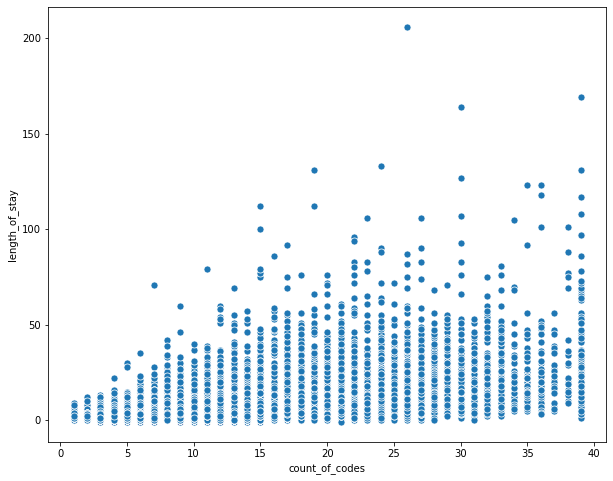

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
stay_vs_code = sns.scatterplot(x = 'count_of_codes', y = 'length_of_stay', 
                                  data = admission, s = 50)


#### Ask your own question about the data and answer it with a visualization of your choice

What is the relationship between the length of stay and disease category?

In [34]:
admission = pd.read_sql("""SELECT * 
               FROM
               (SELECT *
                FROM diagnosis
                LEFT JOIN charlson_codes ON diagnosis.ICD9_CODE = charlson_codes.code
                GROUP BY HADM_ID) AS diag
               LEFT JOIN admission ON diag.HADM_ID=admission.HADM_ID
""", conn)
admission[['ADMITTIME','DISCHTIME']] = admission[['ADMITTIME','DISCHTIME']].apply(pd.to_datetime)
admission['length_of_stay'] = (admission['DISCHTIME'] - admission['ADMITTIME']).dt.days
admission

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,index:1,code,category,...,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,length_of_stay
0,135851,462245,464704,58526,100001,1.0,25013,4346.0,25013,DM,...,ENGL,PROTESTANT QUAKER,DIVORCED,WHITE,2117-09-11 08:59:00,2117-09-11 12:35:00,DIABETIC KETOACIDOSIS,0,1,6
1,123435,449449,446055,54610,100003,1.0,53100,3584.0,53100,PUD,...,ENGL,NOT SPECIFIED,SINGLE,WHITE,2150-04-17 13:10:00,2150-04-17 17:47:00,UPPER GI BLEED,0,1,4
2,978,5692,6306,533,100009,1.0,41401,NaN,None,None,...,None,CATHOLIC,MARRIED,WHITE,None,None,CORONARY ARTERY DISEASE,0,1,4
3,117393,443224,451908,55853,100010,1.0,1890,9977.0,1890,Cancer,...,ENGL,EPISCOPALIAN,MARRIED,WHITE,None,None,RENAL MASS LEFT/SDA,0,1,4
4,282820,612982,596524,87977,100011,1.0,85206,NaN,None,None,...,ENGL,NOT SPECIFIED,SINGLE,HISPANIC OR LATINO,2177-08-29 04:05:00,2177-08-29 05:51:00,MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES,0,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21874,221940,550522,568920,81561,199972,1.0,3962,NaN,None,None,...,ENGL,CATHOLIC,MARRIED,WHITE,None,None,AORTIC VALVE INSUFFICIENCY\AORTIC VALVE REPLAC...,0,1,13
21875,73609,397666,384208,41115,199979,1.0,4241,NaN,None,None,...,ENGL,PROTESTANT QUAKER,SINGLE,WHITE,None,None,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1,5
21876,121968,447956,450862,55617,199984,1.0,41071,80.0,41071,MI,...,ENGL,OTHER,WIDOWED,WHITE,None,None,CHEST PAIN;ELEVATED TROPONIN,0,1,2
21877,290313,620649,627516,94911,199992,1.0,42789,NaN,None,None,...,ENGL,JEWISH,SINGLE,WHITE,None,None,BRADYCARDIA,0,1,2


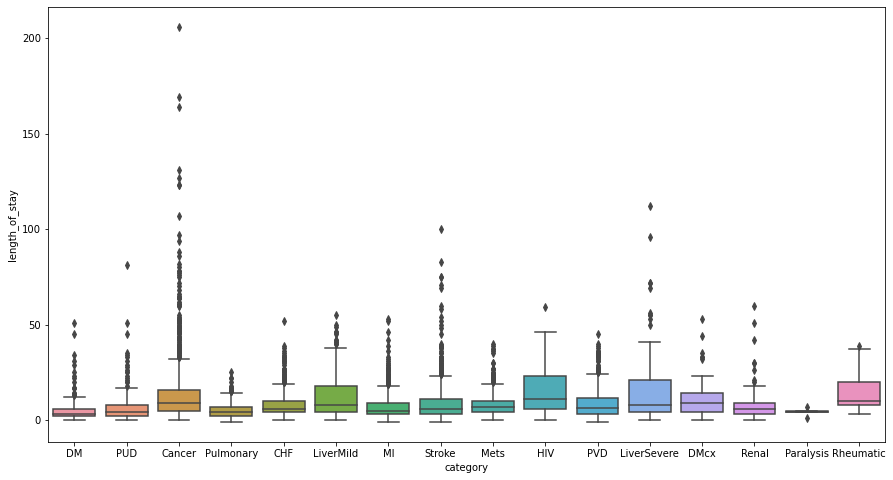

In [35]:
fig, ax = plt.subplots(figsize=(15,8))
stay_vs_code = sns.boxplot(x = 'category', y = 'length_of_stay', 
                                  data = admission)

## Task 4: Create the Design/Model matrix 

For this task, you will create the Design/Model matrix for your clinical risk score. Each row should pertain to a unique encounter, and the columns should be each of the categories available in the `charlson_codes` table. 

In particular, you will need to detect the presence of an ICD-code that belongs to a category in the Charlson Comorbidity Index, and make the corresponding entry a 1 if it is present, and a 0 if it is not. 

In addition, you should create a column that contains the value 1.0 repeated to represent the intercept weight. 

Finally, you will need 1 column that represents whether a patient's death date is within 1 year of their encounter `ADMITTIME`.

Below are a list of steps that can walk you through the process. You do not need to necessarily follow these steps, but at the end you should end up with a matrix that looks something like this (with all of the category columns)


##### As a DataFrame

In [36]:
example_df = pd.DataFrame({'Intercept': [1,1,1], 'CHF': [1, 0, 0], 'MI': [1, 1, 0], 'Stroke': [0, 0, 0], '1_yr_mortality': [1, 0, 0]})
example_df

,Intercept,CHF,MI,Stroke,1_yr_mortality
0,1,1,1,0,1
1,1,0,1,0,0
2,1,0,0,0,0


##### As a Numpy array

In [37]:
example_df.values

array([[1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]])

### Recommended Steps for Creating the Design Matrix

For this task, you will need to use the `admission`, `diagnosis`, `charlson_codes`, and `patient` tables. 

In [38]:
#pd.read_sql("SELECT * FROM admission LIMIT 5", conn)

In [39]:
#pd.read_sql("SELECT * FROM diagnosis LIMIT 5", conn)

In [40]:
#pd.read_sql("SELECT * FROM charlson_codes LIMIT 5", conn)

In [41]:
#pd.read_sql("SELECT * FROM patient LIMIT 5", conn)

To get an accurate death date at the encounter level, join the patient table into the admission table by patient identifier. From there, create a new column that determines whether there has been 1 year or less between the mortality(death) date and the admission time. 

Remember that when working with datetime columns, you will need to utilize the `pd.to_datetime` function. You can subtract times and use the `.dt.days` method to extract the number of days. [Reference](https://stackoverflow.com/a/45039811)

In [4]:
model_matrix_1 = pd.read_sql("""SELECT * FROM admission
               LEFT JOIN patient ON admission.SUBJECT_ID=patient.SUBJECT_ID
""", conn)
# model_matrix_1[['ADMITTIME','DOD']] = model_matrix_1[['ADMITTIME','DOD']].apply(pd.to_datetime)
# # model_matrix['mortality'] = (model_matrix['DOD'] - model_matrix['ADMITTIME']).dt.days
# model_matrix_1['1_yr_mortality'] = ((model_matrix_1['DOD'] - model_matrix_1['ADMITTIME']).dt.days<365)*1
# model_matrix_1 = model_matrix_1[['HADM_ID','1_yr_mortality']]
model_matrix_1

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,...,HAS_CHARTEVENTS_DATA,index,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,0,2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,...,1,241,20,23,M,2082-07-17 00:00:00,None,None,None,0
1,1,13,34,34,144319,2191-02-23 05:23:00,2191-02-25 20:20:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,1,251,30,34,M,1886-07-18 00:00:00,2192-01-30 00:00:00,None,2192-01-30 00:00:00,1
2,2,17,38,36,165660,2134-05-10 11:30:00,2134-05-20 13:16:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,1,253,32,36,M,2061-08-17 00:00:00,None,None,None,0
3,3,25,459,357,101651,2199-10-20 12:05:00,2199-10-23 17:30:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,1,535,336,357,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1
4,4,26,460,357,117876,2199-12-21 22:37:00,2200-01-18 11:45:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,...,1,535,336,357,M,2135-03-22 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,2201-08-02 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21874,21874,58970,58593,98797,105447,2132-12-24 20:06:00,2132-12-25 12:00:00,2132-12-25 12:00:00,EMERGENCY,EMERGENCY ROOM ADMIT,...,1,38472,46212,98797,M,2044-12-27 00:00:00,2132-12-25 00:00:00,2132-12-25 00:00:00,None,1
21875,21875,58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,None,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,1,38473,46213,98800,F,2111-11-05 00:00:00,None,None,None,0
21876,21876,58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,...,1,38474,46214,98802,F,2067-09-21 00:00:00,2151-03-06 00:00:00,2151-03-06 00:00:00,None,1
21877,21877,58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,...,1,38475,46215,98805,M,2158-03-02 00:00:00,None,None,None,0


Next, join the `diagnosis` and `charlson_codes` data together. If there is missing information, use the type of join that removes missing information. Not all diagnosis codes map to an existing Charlson category. 

In [43]:
model_matrix_2 = pd.read_sql("""SELECT * FROM diagnosis 
               INNER JOIN charlson_codes ON diagnosis.ICD9_CODE=charlson_codes.code
""", conn)
model_matrix_2

,index,Unnamed: 0,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,index,code,category
0,0,0,1297,109,172335,1.0,40301,4762,40301,Renal
1,2,2,1299,109,172335,3.0,58281,4862,58281,Renal
2,3,3,1300,109,172335,4.0,5855,5004,5855,Renal
3,4,4,1301,109,172335,5.0,4254,232,4254,CHF
4,6,6,1303,109,172335,7.0,7100,3372,7100,Rheumatic
...,...,...,...,...,...,...,...,...,...,...
55869,320115,651008,639764,97488,161999,9.0,34291,4554,34291,Paralysis
55870,320121,651014,639770,97488,161999,15.0,25000,4332,25000,DM
55871,320123,651016,639772,97488,161999,17.0,4280,288,4280,CHF
55872,320141,651034,639790,97497,168949,3.0,20192,10967,20192,Cancer


Once you have this new DataFrame, you will notice that it is in a long format. You will need to turn it into a wide format so that each category is represented as its own column. You can start with this command to get started:

`.groupby(['id', 'category']).size().unstack()`

In [44]:
model_matrix_2 = model_matrix_2.groupby(['HADM_ID', 'category']).size().unstack()
model_matrix_2

category,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke
HADM_ID,,,,,,,,,,,,,,,,,
100001,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
100010,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100018,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0
199972,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0
199979,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


You will also need to binarize (turn to 1s and 0s) each of the category columns. 

In [45]:
model_matrix_2 = model_matrix_2.replace(np.nan, 0).astype(bool).astype(int)
model_matrix_2

category,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke
HADM_ID,,,,,,,,,,,,,,,,,
100001,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0
100003,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
100009,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
100010,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
100018,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199967,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
199972,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
199979,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Merge all of the data together so that it looks like the example above.

In [46]:
model_matrix = pd.merge(model_matrix_2, model_matrix_1, 
                        how='inner', on='HADM_ID')
model_matrix['Intercept'] = 1
model_matrix = model_matrix[list(('Intercept','CHF','Cancer', 
                                  'DM','DMcx','Dementia',
                                  'HIV','LiverMild','LiverSevere',
                                  'MI','Mets','PUD',
                                  'PVD','Paralysis','Pulmonary',
                                  'Renal','Rheumatic','Stroke',
                                  '1_yr_mortality'))]
model_matrix

,Intercept,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke,1_yr_mortality
0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18022,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
18023,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0
18024,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18025,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0


# Task 5: Fit a logistic regression model via gradient descent

Implement the gradient ascent algorithm and use it to iteratively update some initialized weights for your logistic regression. For this step, do not use an implementation in another library (sklearn, statsmodels). You must write your own implementation using base python, numpy, and other standard libraries. If you have a question about what is allowed, please ask one of the instructors.

Recall that the average loss can be expressed as follows (this is usually displayed with a negative sign out front)

$$\frac{1}{m}\sum_{i=1}^{m}y^{(i)} \log \sigma(\textbf{w}^T\textbf{x}^{(i)}) + (1-y^{(i)}) \log (1- \sigma(\textbf{w}^T\textbf{x}^{(i)}) $$

The Gradient Ascent update equation is given by: 
$$ w_j \leftarrow w_j + \alpha(y-\sigma(\textbf{w}^T\textbf{x}))x_j $$

where $\alpha$ is a learning rate which affects the speed of convergence. 

The pseudocode to fit a logistic regression model looks similar to the following:
```    
Repeat {

  1. Calculate average gradient value over the dataset(for all x_j)
  2. Multiply by the average gradient by the learning rate
  3. Update the weights by adding this value to the original weights

}
```

It is recommended that you have helper functions to perform the logistic function and the calculation of the gradient

In [47]:
def logistic(x):
    y = np.exp(x)/(1+np.exp(x))
    return y

In [48]:
def gradient(x, y, w):
    grad = np.matmul(np.transpose(y - logistic(np.matmul(x, w))), x) / x.shape[0]
    return grad

In [49]:
def logistic_loss(x, y, w):
    sum = 0
    for i in range(len(y)):
        a = logistic(np.transpose(w).dot(x[i]))
        loss = -(y[i] * np.log(a) + (1-y[i]) * np.log(1 - a))
        sum = sum + loss
    return sum/len(y)

In [50]:
def gradient_descent(x, y, w, num_iterations, alpha, n):
    for i in range(num_iterations):
        w = w+alpha*gradient(x, y, w)
        if (i%n==0):
            print(alpha*gradient(x, y, w))
    return w

In [51]:
test_x = example_df.values
test_x

array([[1, 1, 1, 0, 1],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]])

In [52]:
test_y = test_x[:,4]
test_y

array([1, 0, 0])

In [53]:
test_w = np.random.rand(5)

In [54]:
gradient(test_x, test_y, test_w)

array([-0.36545547,  0.04524175, -0.18636699,  0.        ,  0.04524175])

In [55]:
logistic_loss(test_x, test_y, test_w)

0.7011133778330004

In practice, you will want to initialize an array of weights w of the appropriate size with all 0s or some other small random value. Then, you will follow the pseudocode above, and update the weights iteratively. At each step, you will want to compute the value $y - \sigma(\textbf{w}^T\textbf{x})x_j$ over all of the rows of the matrix and find the average value over the entire dataset. Then apply the learning rate and update the weights according to the update equation above.

You will want to repeat this procedure until the algorithm converges. You can play around with the learning rate and the number of total iterations for this program to converge either faster or slower. In addition, you can choose to use other versions of gradient descent, such as mini-batch gradient descent and/or stochastic gradient descent to improve the convergence rate. One way to check for convergence is to check to make sure that the weights are not changing by a certain small threshold. Another way is to run for a number of iterations and check against the `statsmodels` implementation:

In [56]:
gradient_descent(test_x, test_y, test_w, 5000, 1e-7, 500)

[-3.65455463e-08  4.52417501e-09 -1.86366983e-08  0.00000000e+00
  4.52417501e-09]
[-3.65451096e-08  4.52426521e-09 -1.86364131e-08  0.00000000e+00
  4.52426521e-09]
[-3.65446730e-08  4.52435540e-09 -1.86361279e-08  0.00000000e+00
  4.52435540e-09]
[-3.65442364e-08  4.52444559e-09 -1.86358427e-08  0.00000000e+00
  4.52444559e-09]
[-3.65437997e-08  4.52453579e-09 -1.86355574e-08  0.00000000e+00
  4.52453579e-09]
[-3.65433631e-08  4.52462598e-09 -1.86352722e-08  0.00000000e+00
  4.52462598e-09]
[-3.65429265e-08  4.52471618e-09 -1.86349870e-08  0.00000000e+00
  4.52471618e-09]
[-3.65424899e-08  4.52480637e-09 -1.86347018e-08  0.00000000e+00
  4.52480637e-09]
[-3.65420532e-08  4.52489656e-09 -1.86344166e-08  0.00000000e+00
  4.52489656e-09]
[-3.65416166e-08  4.52498675e-09 -1.86341314e-08  0.00000000e+00
  4.52498675e-09]


array([0.14915601, 0.96397445, 0.67334844, 0.14766588, 0.0645486 ])

```
from statsmodels import api as sm

logit = sm.Logit(y, X)
logit.fit().params
```

**After each iteration,** compute the average loss over the entire dataset (the negative of the expression above) and record this loss in a list. After your algorithm has converged, plot the loss (y-axis) versus the iteration number(x-axis). This will also help you to choose a suitable learning rate

In [57]:
def gradient_descent_finalfunction(x, y, w, num_iterations, alpha):
    loss = []
    for i in range(num_iterations):
        w = w+alpha*gradient(x, y, w)
        loss.append(logistic_loss(x, y, w))
    return w, loss;

In [58]:
test_w = np.random.rand(5)

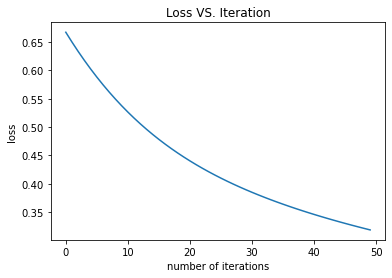

In [59]:
plt.plot(range(50),gradient_descent_finalfunction(test_x, test_y, test_w, 50, 1e-1)[1])
plt.title('Loss VS. Iteration')
plt.xlabel('number of iterations')
plt.ylabel('loss')
plt.show()

In addition, we will hold out a test set to check whether our model generalizes. To do this, we will set aside 80% of the data for training and 20% for the test set. You will fit the above procedure on the training set to get the parameters and will evaluate your model in task 6. Make sure to save your fit parameters. 

In [60]:
# set a random seed
np.random.seed(2020); w = np.random.rand(18)
w

array([0.98627683, 0.87339195, 0.50974552, 0.27183571, 0.33691873,
       0.21695427, 0.27647714, 0.34331559, 0.86215894, 0.15669967,
       0.14088724, 0.75708028, 0.73632492, 0.35566309, 0.34109302,
       0.66680305, 0.21710064, 0.56142698])

In [61]:
w.shape

(18,)

In [62]:
x = np.delete(model_matrix.values, -1, 1)
y = model_matrix.values[:,-1]

In [63]:
x

array([[1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [64]:
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
from sklearn.model_selection import train_test_split
# Fill in this function with your dataset. Here,
# X is the Design matrix 
# and y is the label vector

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2)

In [66]:
X_train.shape

(14421, 18)

In [67]:
y_train.shape

(14421,)

In [68]:
result = gradient_descent_finalfunction(X_train, y_train, w, 100, 0.1)
result[0]

array([-0.96211229,  0.27506653,  0.4645497 , -0.27694942,  0.10055413,
        0.19703918,  0.24917389,  0.07310796,  0.75792797, -0.19403794,
        0.2634076 ,  0.63356086,  0.34312127,  0.25696317, -0.20617443,
        0.22749778,  0.13057953,  0.21692964])

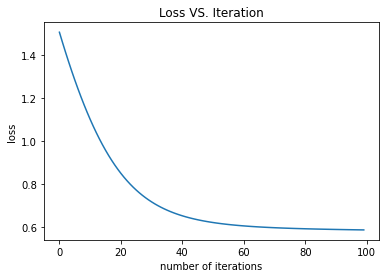

In [69]:
plt.plot(range(100),result[1])
plt.title('Loss VS. Iteration')
plt.xlabel('number of iterations')
plt.ylabel('loss')
plt.show()

In [70]:
result[1]

[1.5042298479077643,
 1.4570431035100728,
 1.411296500398053,
 1.367029454123808,
 1.3242764898377277,
 1.2830666991110096,
 1.2434232644290577,
 1.2053630674515579,
 1.168896395018069,
 1.134026753933014,
 1.100750801935732,
 1.0690583981285506,
 1.0389327717472214,
 1.0103508037801714,
 0.9832834118545136,
 0.9576960252566228,
 0.9335491341561175,
 0.9107988951997633,
 0.8893977746981835,
 0.8692952106451424,
 0.850438275697763,
 0.8327723248748367,
 0.8162416139196651,
 0.8007898768322148,
 0.7863608538038543,
 0.7728987635146858,
 0.7603487163285328,
 0.7486570672319038,
 0.7377717093392674,
 0.7276423103881379,
 0.7182204958688579,
 0.7094599832906308,
 0.7013166726157807,
 0.69374869814366,
 0.6867164471408973,
 0.6801825503544338,
 0.674111849247503,
 0.6684713444172992,
 0.6632301292142901,
 0.6583593121244354,
 0.6538319310136537,
 0.6496228618879303,
 0.6457087244067662,
 0.6420677860016467,
 0.6386798661103236,
 0.6355262417316001,
 0.632589555241851,
 0.6298537251882135,
 0

# Task 6: Compare your model to the Charlson Comorbidity Index 

Below is a table of Charlson Comordibity Weights: 

![](./assets/charlson_weights.png)

Using our subset of diagnosis categories, assign a score to each patient in your test set by multiplying the condition by the associated weight and summing up the entries. Specifically, use the following:

In [71]:
charlson_scores = pd.DataFrame({'Category': [
                            'chf', 
                            'Cancer', 
                            'DM', 
                            'DMcx', 
                            'Dementia', 
                            'HIV', 
                            'LiverMild',
                            'LiverSevere',
                            'MI',
                            'Mets', 
                            'PUD',
                            'PVD',
                            'Paralysis', 
                            'Pulmonary',
                            'Renal',
                            'Rheumatic',
                            'Stroke'
                            ],
              'Score': [1,1,1,2,1,6,3,3,1,2,1,1,1,1,2,1,1]})


charlson_scores

,Category,Score
0,chf,1
1,Cancer,1
2,DM,1
3,DMcx,2
4,Dementia,1
5,HIV,6
6,LiverMild,3
7,LiverSevere,3
8,MI,1
9,Mets,2


In [72]:
charlson_scores.values

array([['chf', 1],
       ['Cancer', 1],
       ['DM', 1],
       ['DMcx', 2],
       ['Dementia', 1],
       ['HIV', 6],
       ['LiverMild', 3],
       ['LiverSevere', 3],
       ['MI', 1],
       ['Mets', 2],
       ['PUD', 1],
       ['PVD', 1],
       ['Paralysis', 1],
       ['Pulmonary', 1],
       ['Renal', 2],
       ['Rheumatic', 1],
       ['Stroke', 1]], dtype=object)

In [73]:
score = [1, 1, 1, 1, 2, 1, 6, 3, 3, 1, 2, 1, 1, 1, 1, 2, 1, 1]

In [74]:
X_test_df = pd.DataFrame(data=X_test, columns=['Intercept','CHF','Cancer', 
                                               'DM','DMcx','Dementia',
                                               'HIV','LiverMild','LiverSevere',
                                               'MI','Mets','PUD',
                                               'PVD','Paralysis','Pulmonary',
                                               'Renal','Rheumatic','Stroke'])
X_test_df

,Intercept,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
3602,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3603,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3604,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [75]:
X_test_df_score = X_test_df.multiply(score, axis='columns')
X_test_df_score

,Intercept,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601,1,0,0,0,0,0,0,3,3,0,0,0,1,0,0,0,0,0
3602,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3603,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3604,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0


In [76]:
col_list = ['CHF','Cancer', 'DM','DMcx',
            'Dementia','HIV','LiverMild','LiverSevere','MI',
            'Mets','PUD','PVD','Paralysis','Pulmonary',
            'Renal','Rheumatic','Stroke']
X_test_df_score['risk_score'] = X_test_df_score[col_list].sum(axis=1)
X_test_df_score

,Intercept,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke,risk_score
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3
2,1,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,1,5
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2
4,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601,1,0,0,0,0,0,0,3,3,0,0,0,1,0,0,0,0,0,7
3602,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
3603,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
3604,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,4


In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

The metric that we will be using to compare the models will be the Area Under the Receiver Operator Characteristic Curve (AUROC). The sklearn function for this is sklearn.metrics.roc_auc_score. You can find out the signature by looking at the documentation or using `?roc_auc_score`

**Your Task**: Create 2 separate sets of predictions: 1 which is just the Charlson score (multiply each row of your design matrix [training set] by the above table while making sure to match the right comorbidity to the right column of your training set) and the other which is your logistic regression (apply the logistic regression formula with the coefficients/weights that you learned). Show the performance on the test set and compare them. How does each of them do?

In [78]:
##On training set
#just the Charlson score
X_train_df = pd.DataFrame(data=X_train, columns=['Intercept','CHF','Cancer', 
                                               'DM','DMcx','Dementia',
                                               'HIV','LiverMild','LiverSevere',
                                               'MI','Mets','PUD',
                                               'PVD','Paralysis','Pulmonary',
                                               'Renal','Rheumatic','Stroke'])
X_train_df_score = X_train_df.multiply(score, axis='columns')
X_train_df_score['risk_score'] = X_train_df_score[col_list].sum(axis=1)
X_train_df_score

,Intercept,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke,risk_score
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,1,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14416,1,0,0,0,0,0,0,3,0,0,0,0,0,0,1,0,0,0,4
14417,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,3
14418,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
14419,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,4


In [79]:
#apply the logistic regression formula with the coefficients/weights that you learned
weight = result[0]

In [80]:
col_list = ['Intercept','CHF','Cancer', 'DM','DMcx',
            'Dementia','HIV','LiverMild','LiverSevere','MI',
            'Mets','PUD','PVD','Paralysis','Pulmonary',
            'Renal','Rheumatic','Stroke']
X_train_df_weight = X_train_df.multiply(weight, axis='columns')
X_train_df_weight['risk_score'] = X_train_df_weight.sum(axis=1)

In [81]:
X_train_df_weight

,Intercept,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke,risk_score
0,-0.962112,0.275067,0.00000,-0.000000,0.000000,0.0,0.0,0.000000,0.0,-0.000000,0.000000,0.0,0.0,0.0,-0.000000,0.000000,0.0,0.00000,-0.687046
1,-0.962112,0.000000,0.00000,-0.000000,0.000000,0.0,0.0,0.000000,0.0,-0.000000,0.000000,0.0,0.0,0.0,-0.206174,0.000000,0.0,0.00000,-1.168287
2,-0.962112,0.000000,0.00000,-0.000000,0.000000,0.0,0.0,0.000000,0.0,-0.000000,0.000000,0.0,0.0,0.0,-0.206174,0.000000,0.0,0.00000,-1.168287
3,-0.962112,0.275067,0.00000,-0.000000,0.100554,0.0,0.0,0.000000,0.0,-0.000000,0.000000,0.0,0.0,0.0,-0.000000,0.000000,0.0,0.00000,-0.586492
4,-0.962112,0.000000,0.00000,-0.000000,0.000000,0.0,0.0,0.000000,0.0,-0.000000,0.000000,0.0,0.0,0.0,-0.206174,0.000000,0.0,0.00000,-1.168287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14416,-0.962112,0.000000,0.00000,-0.000000,0.000000,0.0,0.0,0.073108,0.0,-0.000000,0.000000,0.0,0.0,0.0,-0.206174,0.000000,0.0,0.00000,-1.095179
14417,-0.962112,0.275067,0.00000,-0.000000,0.000000,0.0,0.0,0.000000,0.0,-0.194038,0.000000,0.0,0.0,0.0,-0.000000,0.000000,0.0,0.21693,-0.664154
14418,-0.962112,0.000000,0.46455,-0.000000,0.000000,0.0,0.0,0.000000,0.0,-0.000000,0.000000,0.0,0.0,0.0,-0.000000,0.000000,0.0,0.00000,-0.497563
14419,-0.962112,0.000000,0.46455,-0.276949,0.000000,0.0,0.0,0.000000,0.0,-0.000000,0.000000,0.0,0.0,0.0,-0.000000,0.227498,0.0,0.00000,-0.547014


In [82]:
#On test set
#just the Charlson score
X_test_df_score

,Intercept,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke,risk_score
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3
2,1,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,0,1,5
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,2
4,1,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601,1,0,0,0,0,0,0,3,3,0,0,0,1,0,0,0,0,0,7
3602,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2
3603,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
3604,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,0,0,4


In [83]:
#apply the logistic regression formula with the coefficients/weights that you learned
X_test_df_weight = X_test_df.multiply(weight, axis='columns')
X_test_df_weight['risk_score'] = X_test_df_weight.sum(axis=1)

In [84]:
X_test_df_weight

,Intercept,CHF,Cancer,DM,DMcx,Dementia,HIV,LiverMild,LiverSevere,MI,Mets,PUD,PVD,Paralysis,Pulmonary,Renal,Rheumatic,Stroke,risk_score
0,-0.962112,0.000000,0.00000,-0.276949,0.0,0.0,0.0,0.000000,0.000000,-0.000000,0.000000,0.0,0.000000,0.000000,-0.000000,0.000000,0.0,0.00000,-1.239062
1,-0.962112,0.275067,0.00000,-0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.194038,0.000000,0.0,0.343121,0.000000,-0.000000,0.000000,0.0,0.00000,-0.537962
2,-0.962112,0.000000,0.46455,-0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.000000,0.263408,0.0,0.000000,0.000000,-0.206174,0.000000,0.0,0.21693,-0.223400
3,-0.962112,0.000000,0.00000,-0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.000000,0.000000,0.0,0.343121,0.000000,-0.000000,0.000000,0.0,0.21693,-0.402061
4,-0.962112,0.000000,0.00000,-0.000000,0.0,0.0,0.0,0.073108,0.000000,-0.000000,0.000000,0.0,0.000000,0.000000,-0.000000,0.000000,0.0,0.00000,-0.889004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601,-0.962112,0.000000,0.00000,-0.000000,0.0,0.0,0.0,0.073108,0.757928,-0.000000,0.000000,0.0,0.343121,0.000000,-0.000000,0.000000,0.0,0.00000,0.212045
3602,-0.962112,0.275067,0.00000,-0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.194038,0.000000,0.0,0.000000,0.000000,-0.000000,0.000000,0.0,0.00000,-0.881084
3603,-0.962112,0.275067,0.00000,-0.000000,0.0,0.0,0.0,0.000000,0.000000,-0.000000,0.000000,0.0,0.000000,0.000000,-0.000000,0.000000,0.0,0.21693,-0.470116
3604,-0.962112,0.000000,0.00000,-0.276949,0.0,0.0,0.0,0.000000,0.000000,-0.000000,0.000000,0.0,0.343121,0.000000,-0.000000,0.227498,0.0,0.00000,-0.668443


In [85]:
roc_auc_score(y_test, X_test_df_score.values[:,-1])

0.6312335481851425

In [86]:
roc_auc_score(y_test, X_test_df_weight.values[:,-1])

0.6512494486418805

In [87]:
roc_auc_score(y_train, X_train_df_score.values[:,-1])

0.6260478425020951

In [88]:
roc_auc_score(y_train, X_train_df_weight.values[:,-1])

0.6488333867982671

weighted method performs better